In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import glob
%matplotlib inline

In [2]:
PATH = '../results'

In [3]:
df_list = [ pd.read_pickle(file) for file in glob.glob('{}/*.pkl'.format(PATH)) ]

In [4]:
res = pd.concat(df_list, sort=True, axis=1)

In [5]:
info = pd.read_pickle('/home/SHARED/SOLAR/data/info.pkl')

In [6]:
data = info[['Latitude', 'Longitude']].join(res, how='inner').reset_index().rename({'index': 'Location'}, axis=1)

In [7]:
data

,Location,Latitude,Longitude,GPconstant_Conv2D_LSTM_3times,conv1D_lon,conv1D_lon_lat,GPconstant_LocCon2D_LSTM,GPtorch_LocCon2D_LSTM_periods9
0,DH3,21.31236,-158.08463,0.084423,0.076607,0.076290,0.072774,0.081986
1,DH4,21.31303,-158.08505,0.081165,0.073832,0.075552,0.070560,0.078645
2,DH5,21.31357,-158.08424,0.084074,0.079791,0.078194,0.074141,0.083463
3,DH10,21.31183,-158.08554,0.075382,0.072230,0.073613,0.066954,0.074156
4,DH11,21.31042,-158.08530,0.075014,0.067408,0.066987,0.065842,0.073996
5,DH9,21.31268,-158.08688,0.075371,0.071434,0.071547,0.069958,0.076799
6,DH2,21.31451,-158.08534,0.089349,0.081243,0.084085,0.078675,0.086989
7,DH1,21.31533,-158.08700,0.603756,0.084343,0.084156,0.085600,0.091706
8,AP6,21.30812,-158.07935,0.105224,0.096274,0.096021,0.099207,0.106122
9,AP1,21.31276,-158.08389,0.080547,0.076775,0.077138,0.071073,0.079839


In [8]:
data.to_csv('../results/all.csv', index=False)

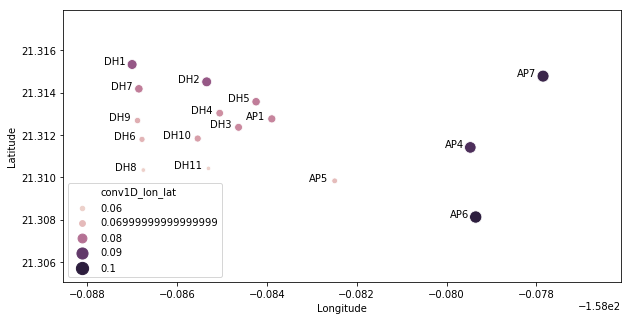

In [9]:
plt.subplots(figsize=(10, 5))
p = sns.scatterplot(x='Longitude', y='Latitude', hue='conv1D_lon_lat', size='conv1D_lon_lat', data=data, sizes=(20, 150))

for idx, row in data.iterrows():
     p.text(row['Longitude']-1.5e-4, row['Latitude'], row['Location'], 
            horizontalalignment='right', size='medium', color='black')